# Feature Scaling Example
You have now seen how feature scaling might change the clusters we obtain from the kmeans algorithm, but it is time to try it out!

First let's get some data to work with. The first cell here will read in the necessary libraries, generate data, and make a plot of the data you will be working with throughout the rest of the notebook.

The dataset you will work with through the notebook is then stored in data.



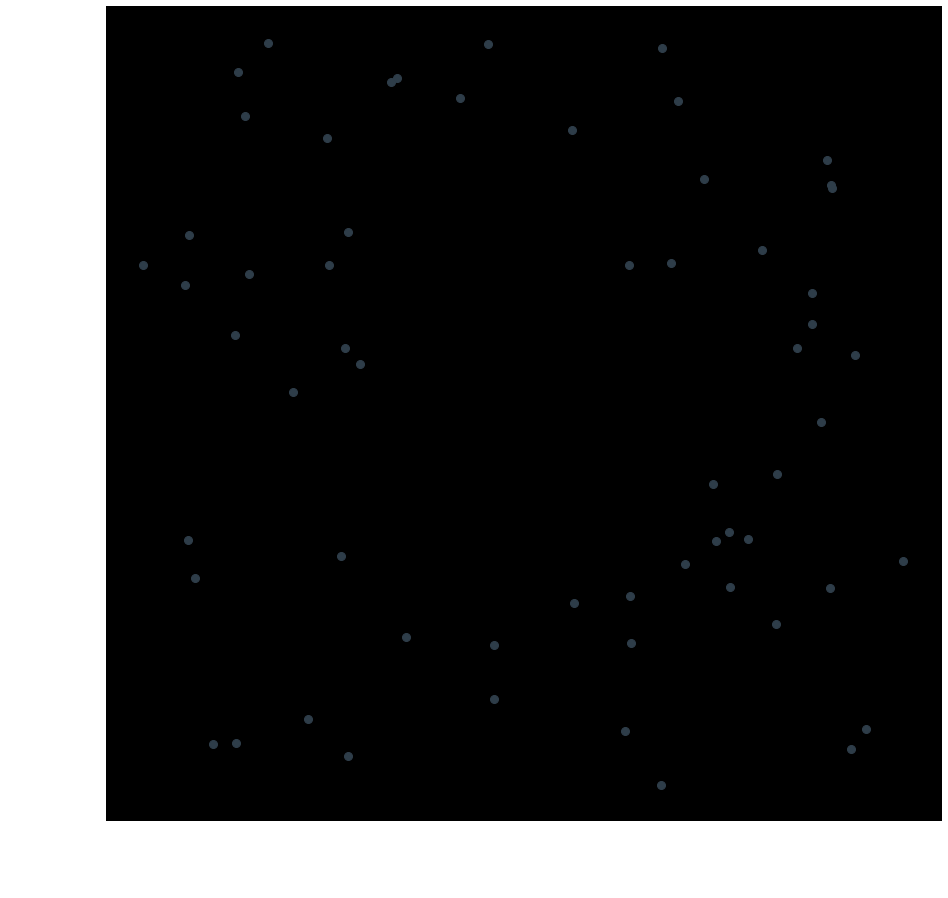

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import Image
from sklearn.datasets.samples_generator import make_blobs
import tests2 as t


%matplotlib inline

# DSND colors: UBlue, Salmon, Gold, Slate
plot_colors = ['#02b3e4', '#ee2e76', '#ffb613', '#2e3d49']

# Light colors: Blue light, Salmon light
plot_lcolors = ['#88d0f3', '#ed8ca1', '#fdd270']

# Gray/bg colors: Slate Dark, Gray, Silver
plot_grays = ['#1c262f', '#aebfd1', '#fafbfc']


def create_data():
    n_points = 120
    X = np.random.RandomState(3200000).uniform(-3, 3, [n_points, 2])
    X_abs = np.absolute(X)

    inner_ring_flag = np.logical_and(X_abs[:,0] < 1.2, X_abs[:,1] < 1.2)
    outer_ring_flag = X_abs.sum(axis = 1) > 5.3
    keep = np.logical_not(np.logical_or(inner_ring_flag, outer_ring_flag))

    X = X[keep]
    X = X[:60] # only keep first 100
    X1 = np.matmul(X, np.array([[2.5, 0], [0, 100]])) + np.array([22.5, 500])
    
    
    plt.figure(figsize = [15,15])

    plt.scatter(X1[:,0], X1[:,1], s = 64, c = plot_colors[-1])

    plt.xlabel('5k Completion Time (min)', size = 30)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
    plt.ylabel('Test Score (raw)', size = 30)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    plt.savefig('C18_FeatScalingEx_01.png', transparent = True)
    
    
    data = pd.DataFrame(X1)
    data.columns = ['5k_Time', 'Raw_Test_Score']
    
    return data

data = create_data()
plt.style.use('dark_background')

In [5]:
data.describe()


,5k_Time,Raw_Test_Score
count,60.000000,60.000000
mean,22.899027,511.699603
std,4.536244,183.222427
min,15.263902,206.597283
25%,18.820638,361.798208
50%,24.033613,545.795365
75%,26.956643,656.346547
max,29.867819,797.599192


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
5k_Time           60 non-null float64
Raw_Test_Score    60 non-null float64
dtypes: float64(2)
memory usage: 1.1 KB


In [7]:
# Use the dictionary to match the values to the corresponding statements
a = 0
b = 60
c = 22.9
d = 4.53
e = 511.7

q1_dict = {
'number of missing values': a,
'the mean 5k time in minutes': c,    
'the mean test score as a raw value': e,
'number of individuals in the dataset': b
}

# check your answer against ours here
t.check_q1(q1_dict)


That looks right!


In [8]:
n_clusters = 2
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(data)


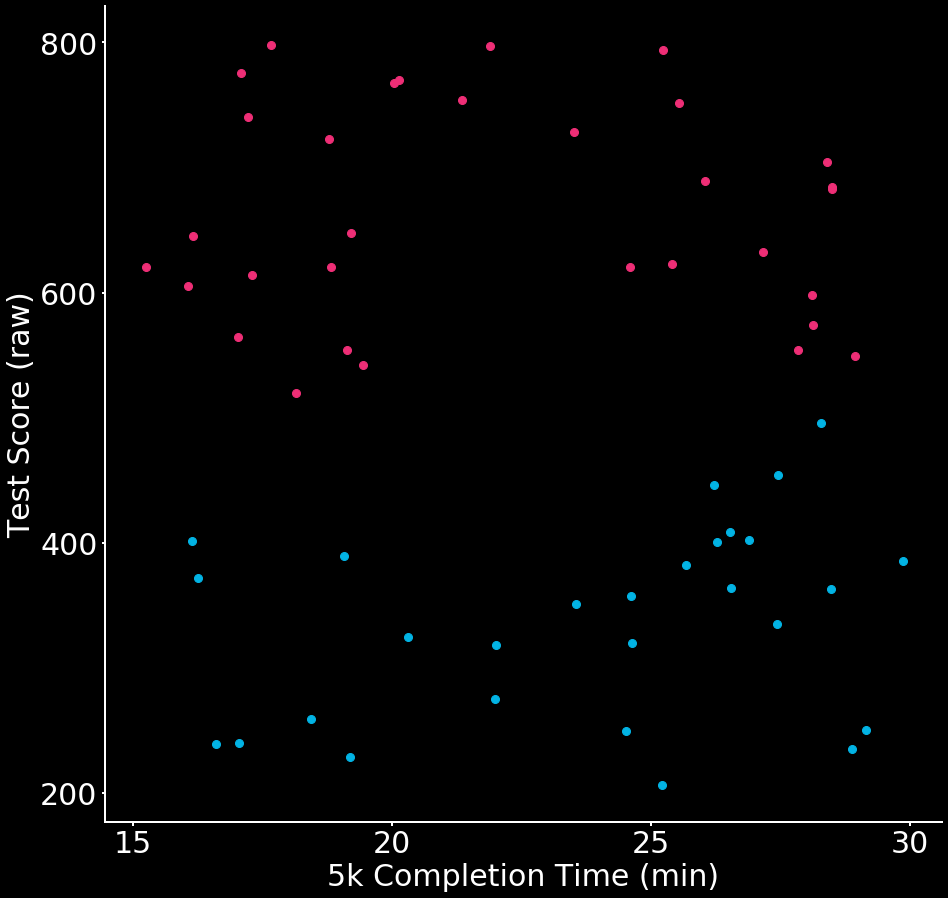

In [9]:
# Run this to see your results

def plot_clusters(data, preds, n_clusters):
    plt.figure(figsize = [15,15])

    for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
        my_members = (preds == k)
        plt.scatter(data['5k_Time'][my_members], data['Raw_Test_Score'][my_members], s = 64, c = col)

    plt.xlabel('5k Completion Time (min)', size = 30)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
    plt.ylabel('Test Score (raw)', size = 30)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    
plot_clusters(data, preds, 2)


In [10]:
data['test_scaled'] = (data['Raw_Test_Score'] - np.mean(data['Raw_Test_Score']))/np.std(data['Raw_Test_Score'])
data['5k_time_sec'] = data['5k_Time']*60

In [11]:
n_clusters = 2
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(data)